Alumno: Jorge Luis Toral Gamez

Repositorio: https://github.com/Jorge-1501/Redes-Neuronales.git

# Ingreso a Drive y GitHub

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from getpass import getpass

PASS = getpass('Enter your password')

!git config --global user.email "jltg_1501@hotmail.com"
!git config --global user.name "Jorge-1501"
!git config --global user.password {PASS}

Enter your password··········


In [4]:
!pwd

/content


In [5]:
%cd /content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src

/content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src


In [ ]:
!ls -al

conv.py			   network2.py
Épocas_dígitos.png	   network3.py
Épocas_SGDconMomentum.png  network.py
expand_mnist.py		   __pycache__
.ipynb_checkpoints	   Reconocimiento_digitos.ipynb
mnist_average_darkness.py  Tarea_2.pdf
mnist_loader.py		   Tarea3-Redes.ipynb
mnist_svm.py


In [8]:
!git status

Refresh index: 100% (99/99), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
#!git add .

In [ ]:
#!git commit -m 'Notebook creada: Tarea3-Redes'

In [ ]:
#!git push

# Inicio de la Tarea 3

## Parte 1
Red con Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Creación del modelo [784, 30, 10]
model = models.Sequential()
model.add(layers.Dense(784, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(30, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
custom_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-09)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 22s 4ms/step - loss: 0.3658 - accuracy: 0.8999 - val_loss: 0.1831 - val_accuracy: 0.9463
Epoch 2/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1560 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9644
Epoch 3/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1088 - accuracy: 0.9679 - val_loss: 0.1111 - val_accuracy: 0.9695
Epoch 4/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0855 - accuracy: 0.9754 - val_loss: 0.1062 - val_accuracy: 0.9716
Epoch 5/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0691 - accuracy: 0.9805 - val_loss: 0.1052 - val_accuracy: 0.9716
Epoch 6/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0560 - accuracy: 0.9840 - val_loss: 0.1110 - val_accuracy: 0.9722
Epoch 7/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0976 - val_ac

In [ ]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9819
Precisión en el conjunto de prueba: 0.9818999767303467


In [ ]:
import matplotlib.pyplot as plt

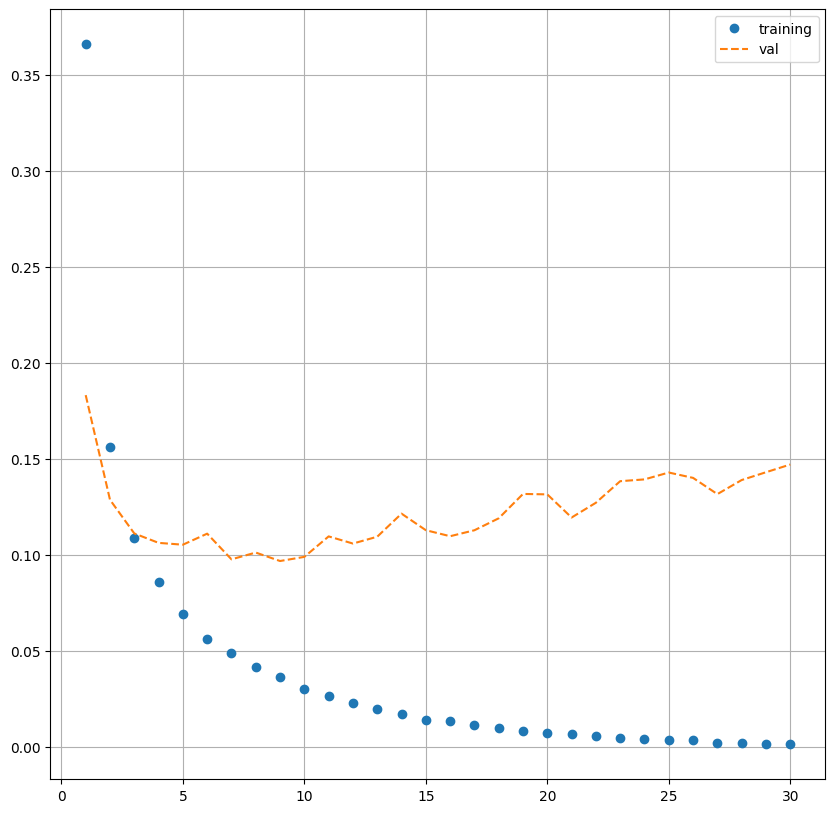

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.grid()
plt.show()

¿Obtuviste resultados similares? No, fueron notablemente mejores. Se obtuvo un accurancy del 0.9815 contra un 0.8412 del anterior modelo utilizando CPU. Mientras que al cambiar el entorno a una T4 GPU el tiempo se redujo a 9 minutos y un accurancy de 0.9818. El sobreajuste se mantiene igual en cada caso.


¿Tardó lo mismo para entrenar el mismo número de epocas? Tardó menos, un aproximado de 21 minutos contra los casi 30 anteriormente.

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git status
!git add .
!git commit -m "Modificación de entorno y corrección de número de capas en parte 1 de tarea 3"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 1e1f601] Modificación de entorno y corrección de número de capas en parte 1 de tarea 3
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (98%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 29.68 KiB | 2.97 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   fb88598..1e1f601  main -> main


## Parte 2

### Modificacion de parámetros 1

In [ ]:
#import tensorflow as tf
#import matplotlib.pyplot as plt
#from tensorflow.keras import layers, models
#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Creación del modelo
model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
custom_optimizer2 = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model2.compile(optimizer = custom_optimizer2,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Entrenar el modelo
history2 = model2.fit(train_images, train_labels, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
4800/4800 [==============================] - 24s 5ms/step - loss: 0.3773 - accuracy: 0.8982 - val_loss: 0.1842 - val_accuracy: 0.9497
Epoch 2/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1574 - accuracy: 0.9556 - val_loss: 0.1350 - val_accuracy: 0.9621
Epoch 3/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1097 - accuracy: 0.9691 - val_loss: 0.1134 - val_accuracy: 0.9671
Epoch 4/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0826 - accuracy: 0.9764 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 5/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0655 - accuracy: 0.9814 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 6/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0514 - accuracy: 0.9858 - val_loss: 0.0896 - val_accuracy: 0.9733
Epoch 7/50
4800/4800 [==============================] - 17s 3ms/step - loss: 0.0413 - accuracy: 0.9888 - val_loss: 0.0799 - val_ac

In [ ]:
# Evaluación el modelo en el conjunto de prueba
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.1383 - accuracy: 0.9798
Precisión en el conjunto de prueba: 0.9797999858856201


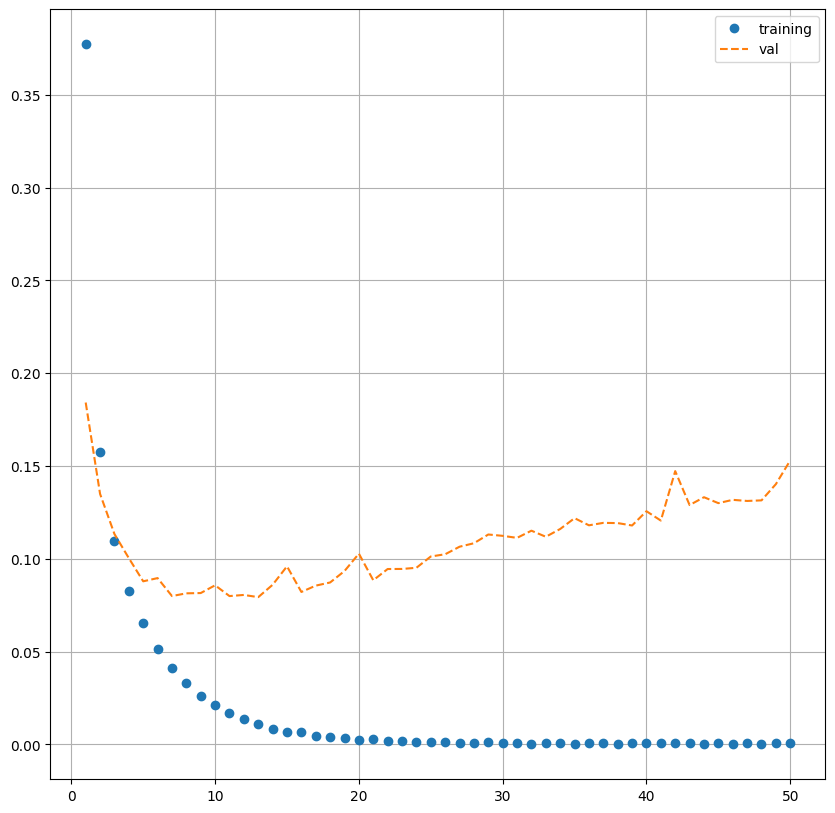

In [ ]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values2)+1)
plt.plot(epoch,loss_values2, 'o',label='training')
plt.plot(epoch,val_loss_values2, '--',label='val')
plt.legend()
plt.grid()
plt.show()

En esta red seleccioné un activación 'relu' para las capas ocultas y una softmax para la última capa. Aumenté el número de epocas por 50 y trabajé con una $\eta = 0.0001$ y Modifiqué el número de neuronas utilizadas de ([784,30,10]) por ([512,30,10]).
Los resultados fueron un mayor sobreajuste y saltos en la convergencia final, por estar muy cerca del accurancy de 1.000.

In [ ]:
!git status
!git add .
!git commit -m "Cambio de función de activación, número de neuronas y optimizador, mayor sobreajuste"
!git push

Refresh index: 100% (96/96), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main f050d97] Cambio de función de activación, número de neuronas y optimizador, mayor sobreajuste
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (97%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 30.74 KiB | 2.56 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   1e1f601..f050d97  main -> main


### Modificacion de parámetros 2

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Creación del modelo
model3 = models.Sequential()
model3.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
#model3.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model3.add(layers.Dense(24, activation='relu', input_shape=(28 * 28,)))
model3.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)

model3.compile(optimizer = custom_optimizer3,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Entrenar el modelo
history3 = model3.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 23s 4ms/step - loss: 1.0514 - accuracy: 0.7498 - val_loss: 0.4790 - val_accuracy: 0.8932
Epoch 2/30
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4117 - accuracy: 0.8998 - val_loss: 0.3268 - val_accuracy: 0.9156
Epoch 3/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3162 - accuracy: 0.9174 - val_loss: 0.2750 - val_accuracy: 0.9259
Epoch 4/30
4800/4800 [==============================] - 19s 4ms/step - loss: 0.2719 - accuracy: 0.9280 - val_loss: 0.2450 - val_accuracy: 0.9342
Epoch 5/30
4800/4800 [==============================] - 19s 4ms/step - loss: 0.2429 - accuracy: 0.9347 - val_loss: 0.2239 - val_accuracy: 0.9381
Epoch 6/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2213 - accuracy: 0.9398 - val_loss: 0.2087 - val_accuracy: 0.9440
Epoch 7/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2040 - accuracy: 0.9447 - val_loss: 0.1952 - val_ac

In [ ]:
# Evaluación el modelo en el conjunto de prueba
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc3)

313/313 [==============================] - 1s 3ms/step - loss: 0.0943 - accuracy: 0.9722
Precisión en el conjunto de prueba: 0.9721999764442444


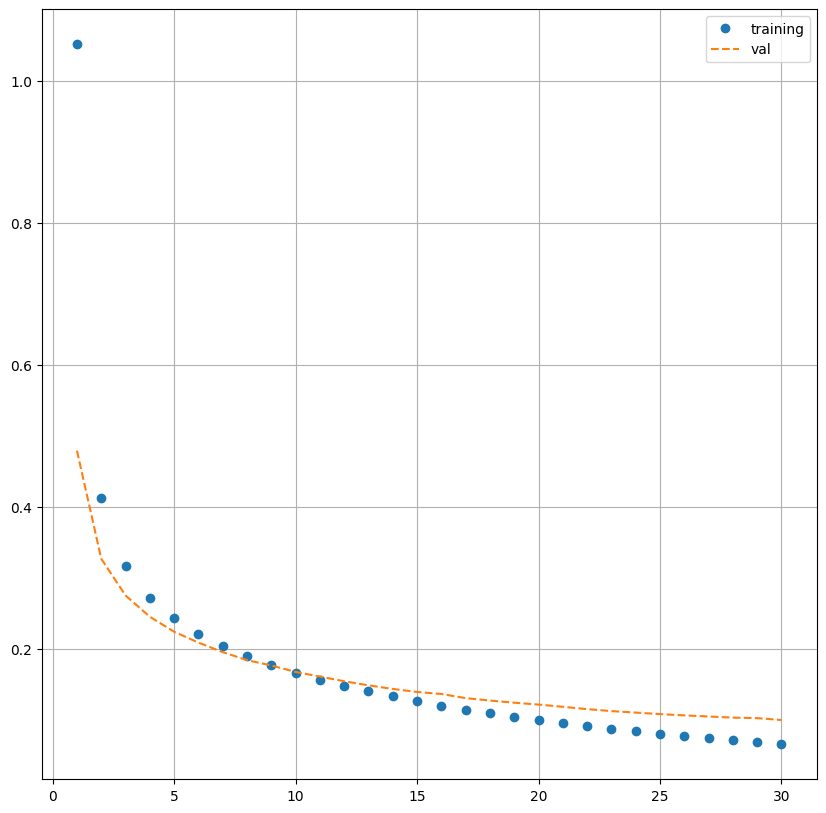

In [ ]:
history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values3)+1)
plt.plot(epoch,loss_values3, 'o',label='training')
plt.plot(epoch,val_loss_values3, '--',label='val')
plt.legend()
plt.grid()
plt.show()

En esta red seleccioné un activación 'relu' para las capas ocultas y una softmax para la última capa. Redujé el número de epocas a 30 y trabajé con una $\eta = 0.0001$ y Modifiqué el número de neuronas utilizadas de ([512,30,10]) por ([784,24,10]). También modifiqué los $\beta's$ para una aprendizaje más lento.

Los resultados no mostraron sobreajuste, pero la tasa de aprendizaje fue más lenta y obtuvo un menor accurancy, 0.9721 respecto a un 0.9797 de la anterior configuración.

In [ ]:
!git status
!git add .
!git commit -m "Cambio de parámetros y número de neuronas. No hay sobreajuste pero accurancy menor."
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 813279b] Cambio de parámetros y número de neuronas. No hay sobreajuste pero accurancy menor.
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (97%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 24.29 KiB | 2.70 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   f050d97..813279b  main -> main


### Tercera modificación

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Creación del modelo
model4 = models.Sequential()
model4.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
#model3.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model4.add(layers.Dense(24, activation='relu', input_shape=(28 * 28,)))
model4.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
custom_optimizer4 = Adam(learning_rate=0.000005, beta_1=0.97, beta_2=0.999, epsilon=1e-10)

model4.compile(optimizer = custom_optimizer4,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Entrenar el modelo
history4 = model4.fit(train_images, train_labels, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
4800/4800 [==============================] - 20s 4ms/step - loss: 1.3797 - accuracy: 0.6732 - val_loss: 0.8039 - val_accuracy: 0.8366
Epoch 2/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.6556 - accuracy: 0.8543 - val_loss: 0.5068 - val_accuracy: 0.8842
Epoch 3/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.4726 - accuracy: 0.8881 - val_loss: 0.4014 - val_accuracy: 0.9021
Epoch 4/50
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3921 - accuracy: 0.9021 - val_loss: 0.3459 - val_accuracy: 0.9134
Epoch 5/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3448 - accuracy: 0.9119 - val_loss: 0.3106 - val_accuracy: 0.9198
Epoch 6/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3122 - accuracy: 0.9183 - val_loss: 0.2857 - val_accuracy: 0.9237
Epoch 7/50
4800/4800 [==============================] - 21s 4ms/step - loss: 0.2878 - accuracy: 0.9240 - val_loss: 0.2662 - val_ac

In [ ]:
# Evaluación el modelo en el conjunto de prueba
test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc4)

313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9698
Precisión en el conjunto de prueba: 0.9697999954223633


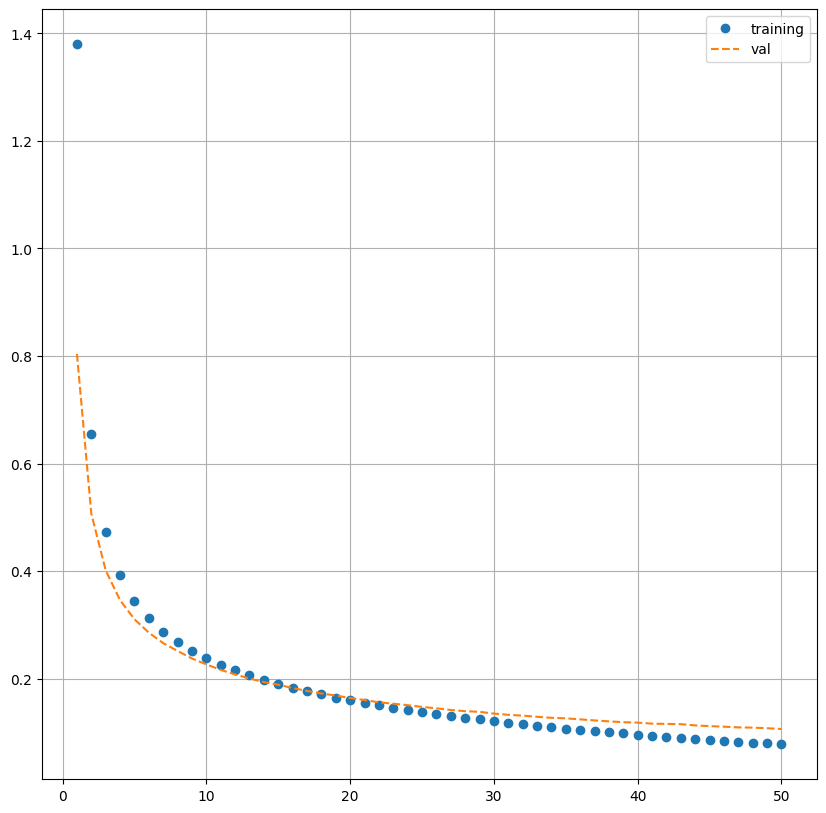

In [ ]:
history_dict4 = history4.history
loss_values4 = history_dict4['loss']
val_loss_values4 = history_dict4['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values4)+1)
plt.plot(epoch,loss_values4, 'o',label='training')
plt.plot(epoch,val_loss_values4, '--',label='val')
plt.legend()
plt.grid()
plt.show()

Modificación del modelo 3. aumenté el número de epocas a 50 y trabajé con una $\eta = 0.00005$. También modifiqué los $\beta's$ para una aprendizaje más lento.

Los resultados no mostraron sobreajuste, pero la tasa de aprendizaje fue más lenta y obtuvo un menor accurancy, 0.9697 respecto a un 0.9721 de la anterior configuración.

In [ ]:
!git status
!git add .
!git commit -m "Modelo 4: cambio de parámetros del modelo 3 e incremento de épocas. No hay sobreajuste pero accurancy menor."
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 180feef] Modelo 4: cambio de parámetros del modelo 3 e incremento de épocas. No hay sobreajuste pero accurancy menor.
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 27.00 KiB | 3.00 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   813279b..180feef  main -> main


### Guardado de modelos

In [ ]:
# Guardar el primer modelo
model3.save("modelo3.h5")

# Guardar el segundo modelo con un nombre diferente
model4.save("modelo4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!git status
!git add .
!git commit -m "Guardado de los 2 mejores modelos sin sobreajuste"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	modelo3.h5
	modelo4.h5

no changes added to commit (use "git add" and/or "git commit -a")
[main d72a956] Guardado de los 2 mejores modelos sin sobreajuste
 3 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 Digitos/src/modelo3.h5
 create mode 100644 Digitos/src/modelo4.h5
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 8.55 MiB | 6.90 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-N

## Parte 3
Implimentación de regularizadores

#### Entrenamiento hasta sobreajuste

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [7]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Cargar el modelo preentrenado
modelo_preentrenado = tf.keras.models.load_model("modelo3.h5")

# Se define el callback ModelCheckpoint para guardar el mejor modelo en un archivo diferente
checkpoint_mejor_modelo = ModelCheckpoint("mejor_modelo_segundo_entrenamiento.h5", monitor="val_loss", save_best_only=True)

# Compilación del modelo preentrenado (utilizando el mismo optimizador y función de pérdida)
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)

modelo_preentrenado.compile(optimizer=custom_optimizer3, loss="categorical_crossentropy", metrics=["accuracy"])

# Entrena el modelo preentrenado con el callback para guardar el mejor modelo
history_train2 = modelo_preentrenado.fit(train_images, train_labels, epochs=60, batch_size=10,
                                         callbacks=[checkpoint_mejor_modelo],
                                         validation_split=0.2)

# Cargar el mejor modelo guardado durante el segundo entrenamiento
mejor_modelo_segundo_entrenamiento = tf.keras.models.load_model("mejor_modelo_segundo_entrenamiento.h5")

Epoch 1/60
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0630 - accuracy: 0.9844 - val_loss: 0.0973 - val_accuracy: 0.9718
Epoch 2/60
  27/4800 [..............................] - ETA: 19s - loss: 0.0693 - accuracy: 0.9815

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4800/4800 [==============================] - 19s 4ms/step - loss: 0.0603 - accuracy: 0.9849 - val_loss: 0.0967 - val_accuracy: 0.9719
Epoch 3/60
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0581 - accuracy: 0.9856 - val_loss: 0.0947 - val_accuracy: 0.9729
Epoch 4/60
4800/4800 [==============================] - 22s 4ms/step - loss: 0.0557 - accuracy: 0.9860 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 5/60
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0539 - accuracy: 0.9866 - val_loss: 0.0927 - val_accuracy: 0.9726
Epoch 6/60
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0517 - accuracy: 0.9870 - val_loss: 0.0912 - val_accuracy: 0.9729
Epoch 7/60
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0499 - accuracy: 0.9878 - val_loss: 0.0906 - val_accuracy: 0.9737
Epoch 8/60
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0480 - accuracy: 0.9885 - val_loss: 0.0901 - val_accuracy: 0.9

In [ ]:
# Evaluación el modelo en el conjunto de prueba
test_lossR3, test_accR3 = mejor_modelo_segundo_entrenamiento.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_accR3)

313/313 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9790
Precisión en el conjunto de prueba: 0.9789999723434448


In [15]:
history_dictR3 = history_train2.history
loss_valuesR3 = history_dictR3['loss']
val_loss_valuesR3 = history_dictR3['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_valuesR3)+1)
plt.plot(epoch,loss_valuesR3, 'o',label='training')
plt.plot(epoch,val_loss_valuesR3, '--',label='val')
plt.legend()
plt.grid()
plt.show()

NameError: ignored

In [ ]:
!git status
!git add .
!git commit -m "Mejor modelo de 2do entrenamiento"
!git push

Refresh index: 100% (98/98), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mejor_modelo_segundo_entrenamiento.h5

no changes added to commit (use "git add" and/or "git commit -a")
[main 4df50aa] Mejor modelo de 2do entrenamiento
 2 files changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (91%)
 create mode 100644 Digitos/src/mejor_modelo_segundo_entrenamiento.h5
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 6.29 MiB | 1.19 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), complete

#### L1

In [9]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
# Cargar el modelo preentrenado
modelo_preentrenado_l1 = tf.keras.models.load_model("mejor_modelo_segundo_entrenamiento.h5")

# Agregar capas de dropout y regularización L1
modelo_preentrenado_l1.add(layers.Dense(10, activation='relu', kernel_regularizer=l1(0.00001), name="mi_capa_l1"))

# Compilar el modelo con las nuevas configuraciones
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)
modelo_preentrenado_l1.compile(optimizer=custom_optimizer3, loss="categorical_crossentropy", metrics=["accuracy"])

# Define el callback ModelCheckpoint para guardar el mejor modelo
checkpoint_mejor_modelo_l1 = ModelCheckpoint("mejor_modelo_l1.h5", monitor="val_loss", save_best_only=True)

# Entrena el modelo preentrenado con el callback para guardar el mejor modelo
history_train_l1 = modelo_preentrenado_l1.fit(train_images, train_labels, epochs=15, batch_size=10,
                                         callbacks=[checkpoint_mejor_modelo_l1],
                                         validation_split=0.2)

# Cargar el mejor modelo guardado durante el segundo entrenamiento
mejor_modelo_l1 = tf.keras.models.load_model("mejor_modelo_l1.h5")

Epoch 1/15
4783/4800 [============================>.] - ETA: 0s - loss: 6.6032 - accuracy: 0.1827

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4800/4800 [==============================] - 23s 4ms/step - loss: 6.5968 - accuracy: 0.1831 - val_loss: 4.7692 - val_accuracy: 0.2360
Epoch 2/15
4800/4800 [==============================] - 21s 4ms/step - loss: 4.0507 - accuracy: 0.3882 - val_loss: 3.1242 - val_accuracy: 0.4302
Epoch 3/15
4800/4800 [==============================] - 19s 4ms/step - loss: 2.8745 - accuracy: 0.4858 - val_loss: 2.8998 - val_accuracy: 0.5124
Epoch 4/15
4800/4800 [==============================] - 21s 4ms/step - loss: 2.7147 - accuracy: 0.5239 - val_loss: 2.7919 - val_accuracy: 0.5163
Epoch 5/15
4800/4800 [==============================] - 20s 4ms/step - loss: 2.5941 - accuracy: 0.5552 - val_loss: 2.6764 - val_accuracy: 0.5475
Epoch 6/15
4800/4800 [==============================] - 20s 4ms/step - loss: 2.4860 - accuracy: 0.5514 - val_loss: 2.6077 - val_accuracy: 0.5460
Epoch 7/15
4800/4800 [==============================] - 20s 4ms/step - loss: nan - accuracy: 0.2483 - val_loss: nan - val_accuracy: 0.0995
Ep

In [11]:
# Evaluación el modelo en el conjunto de prueba
test_loss_l1, test_acc_l1 = mejor_modelo_l1.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc_l1)

313/313 [==============================] - 1s 3ms/step - loss: 2.5517 - accuracy: 0.5516
Precisión en el conjunto de prueba: 0.5515999794006348


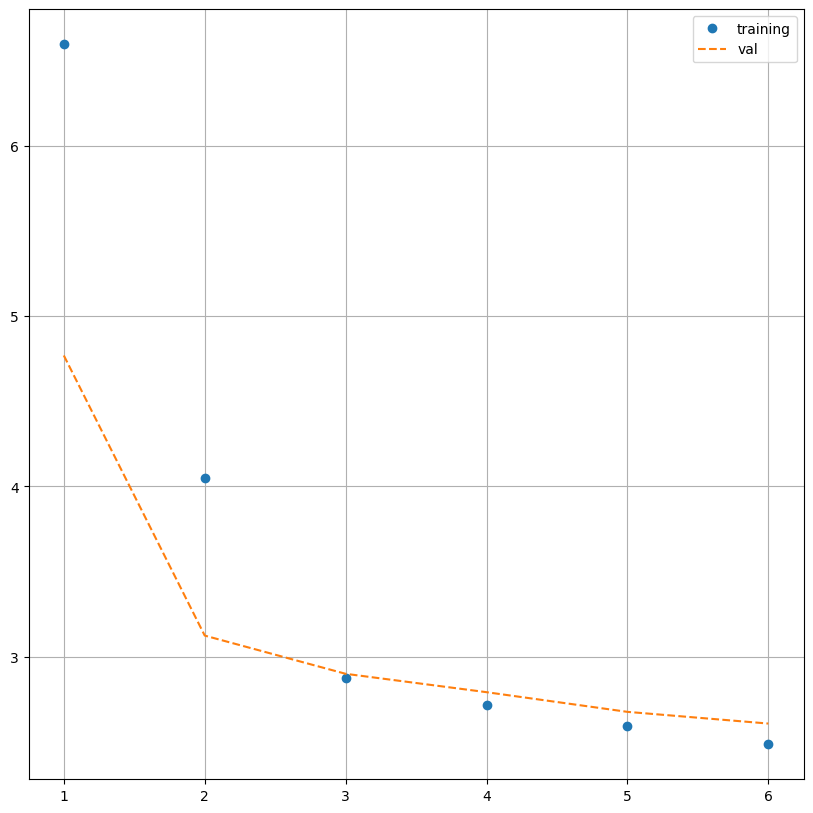

In [14]:
history_dict_l1 = history_train_l1.history
loss_values_l1 = history_dict_l1['loss']
val_loss_values_l1 = history_dict_l1['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values_l1)+1)
plt.plot(epoch,loss_values_l1, 'o',label='training')
plt.plot(epoch,val_loss_values_l1, '--',label='val')
plt.legend()
plt.grid()
plt.show()

El modelo con la regularización L1 pierde muy rápido los valores de entrenamiento.

In [21]:
!git status
!git add .
!git commit -m "Corrección de gráfica e implementación L1. Pérdida de valores demasiado rápido"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mejor_modelo_l1.h5
	mejor_modelo_l2.h5

no changes added to commit (use "git add" and/or "git commit -a")
[main a8a0e5c] Corrección de gráfica e implementación L1. Pérdida de valores demasiado rápido
 3 files changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (90%)
 create mode 100644 Digitos/src/mejor_modelo_l1.h5
 create mode 100644 Digitos/src/mejor_modelo_l2.h5
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 12.72 MiB | 10.61 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0), pack-reused 0
r

#### L2

In [18]:
# Cargar el modelo preentrenado
modelo_preentrenado_l2 = tf.keras.models.load_model("mejor_modelo_segundo_entrenamiento.h5")

# Agregar capas de dropout y regularización L2
modelo_preentrenado_l2.add(layers.Dense(10, activation='relu', kernel_regularizer=l2(0.00001), name="mi_capa_l2"))

# Compilar el modelo con las nuevas configuraciones
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)
modelo_preentrenado_l2.compile(optimizer=custom_optimizer3, loss="categorical_crossentropy", metrics=["accuracy"])

# Define el callback ModelCheckpoint para guardar el mejor modelo
checkpoint_mejor_modelo_l2 = ModelCheckpoint("mejor_modelo_l2.h5", monitor="val_loss", save_best_only=True)

# Entrena el modelo preentrenado con el callback para guardar el mejor modelo
history_train_l2 = modelo_preentrenado_l2.fit(train_images, train_labels, epochs=15, batch_size=10,
                                         callbacks=[checkpoint_mejor_modelo_l2],
                                         validation_split=0.2)

# Cargar el mejor modelo guardado durante el segundo entrenamiento
mejor_modelo_l2 = tf.keras.models.load_model("mejor_modelo_l2.h5")

Epoch 1/15
4792/4800 [============================>.] - ETA: 0s - loss: 8.0105 - accuracy: 0.1354

Exception ignored in: <function _xla_gc_callback at 0x7dcc363136d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


4800/4800 [==============================] - 72s 15ms/step - loss: 8.0081 - accuracy: 0.1355 - val_loss: 4.7607 - val_accuracy: 0.1807
Epoch 2/15
4800/4800 [==============================] - 19s 4ms/step - loss: 3.9984 - accuracy: 0.2134 - val_loss: 3.6960 - val_accuracy: 0.2542
Epoch 3/15
4800/4800 [==============================] - 21s 4ms/step - loss: 3.5573 - accuracy: 0.2635 - val_loss: 3.4585 - val_accuracy: 0.2905
Epoch 4/15
4800/4800 [==============================] - 20s 4ms/step - loss: 3.3512 - accuracy: 0.3453 - val_loss: 3.3530 - val_accuracy: 0.4037
Epoch 5/15
4800/4800 [==============================] - 22s 5ms/step - loss: 3.2269 - accuracy: 0.4128 - val_loss: 3.2322 - val_accuracy: 0.4177
Epoch 6/15
4800/4800 [==============================] - 20s 4ms/step - loss: 3.0984 - accuracy: 0.4205 - val_loss: 3.1272 - val_accuracy: 0.4177
Epoch 7/15
4800/4800 [==============================] - 20s 4ms/step - loss: 2.9865 - accuracy: 0.4279 - val_loss: 3.0413 - val_accuracy: 0.

In [19]:
# Evaluación el modelo en el conjunto de prueba
test_loss_l2, test_acc_l2 = mejor_modelo_l2.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc_l2)

313/313 [==============================] - 1s 3ms/step - loss: 2.6965 - accuracy: 0.4569
Precisión en el conjunto de prueba: 0.4569000005722046


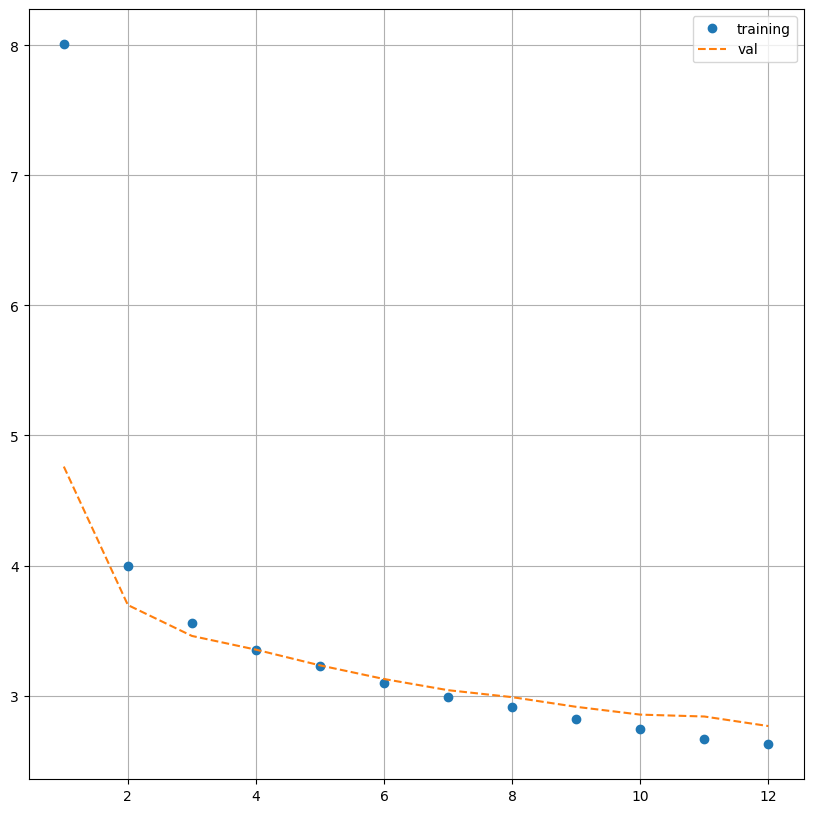

In [20]:
history_dict_l2 = history_train_l2.history
loss_values_l2 = history_dict_l2['loss']
val_loss_values_l2 = history_dict_l2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values_l2)+1)
plt.plot(epoch,loss_values_l2, 'o',label='training')
plt.plot(epoch,val_loss_values_l2, '--',label='val')
plt.legend()
plt.grid()
plt.show()

In [22]:
!git status
!git add .
!git commit -m "Implementación L2. Mejor control que L1 pero termina perdiendo los valores muy rápido."
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 1bf7635] Implementación L2. Mejor control que L1 pero termina perdiendo los valores muy rápido.
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 872 bytes | 290.00 KiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   a8a0e5c..1bf7635  main -> main


#### L1-L2

In [25]:
# Cargar el modelo preentrenado
modelo_preentrenado_l1_l2 = tf.keras.models.load_model("mejor_modelo_segundo_entrenamiento.h5")

# Agregar capas de dropout y regularización L2
modelo_preentrenado_l1_l2.add(layers.Dense(10, activation='relu',
                                        kernel_regularizer=l1_l2(l1=0.00001, l2=0.0001),
                                        name="mi_capa_l1_l2"))

# Compilar el modelo con las nuevas configuraciones
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)
modelo_preentrenado_l1_l2.compile(optimizer=custom_optimizer3,
                                  loss="categorical_crossentropy",
                                  metrics=["accuracy"])

# Define el callback ModelCheckpoint para guardar el mejor modelo
checkpoint_mejor_modelo_l1_l2 = ModelCheckpoint("mejor_modelo_l1_l2.h5", monitor="val_loss", save_best_only=True)

# Entrena el modelo preentrenado con el callback para guardar el mejor modelo
history_train_l1_l2 = modelo_preentrenado_l1_l2.fit(train_images, train_labels, epochs=20, batch_size=10,
                                         callbacks=[checkpoint_mejor_modelo_l1_l2],
                                         validation_split=0.2)

# Cargar el mejor modelo guardado durante el segundo entrenamiento
mejor_modelo_l1_l2 = tf.keras.models.load_model("mejor_modelo_l1_l2.h5")

Epoch 1/20
4800/4800 [==============================] - 23s 4ms/step - loss: 8.8039 - accuracy: 0.3386 - val_loss: 8.4609 - val_accuracy: 0.3688
Epoch 2/20
4800/4800 [==============================] - 20s 4ms/step - loss: 6.2218 - accuracy: 0.3679 - val_loss: 4.6940 - val_accuracy: 0.3777
Epoch 3/20
4800/4800 [==============================] - 20s 4ms/step - loss: 4.4351 - accuracy: 0.3855 - val_loss: 4.2503 - val_accuracy: 0.3781
Epoch 4/20
4800/4800 [==============================] - 21s 4ms/step - loss: 4.0030 - accuracy: 0.3737 - val_loss: 3.8205 - val_accuracy: 0.3647
Epoch 5/20
4800/4800 [==============================] - 20s 4ms/step - loss: 3.6427 - accuracy: 0.3595 - val_loss: 3.4364 - val_accuracy: 0.3352
Epoch 6/20
4800/4800 [==============================] - 22s 5ms/step - loss: 3.2242 - accuracy: 0.3560 - val_loss: 3.0304 - val_accuracy: 0.3960
Epoch 7/20
4800/4800 [==============================] - 23s 5ms/step - loss: 2.8841 - accuracy: 0.4067 - val_loss: 2.7326 - val_ac

In [26]:
# Evaluación el modelo en el conjunto de prueba
test_loss_l1_l2, test_acc_l1_l2 = mejor_modelo_l1_l2.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc_l1_l2)

313/313 [==============================] - 1s 2ms/step - loss: 2.3866 - accuracy: 0.6866
Precisión en el conjunto de prueba: 0.6866000294685364


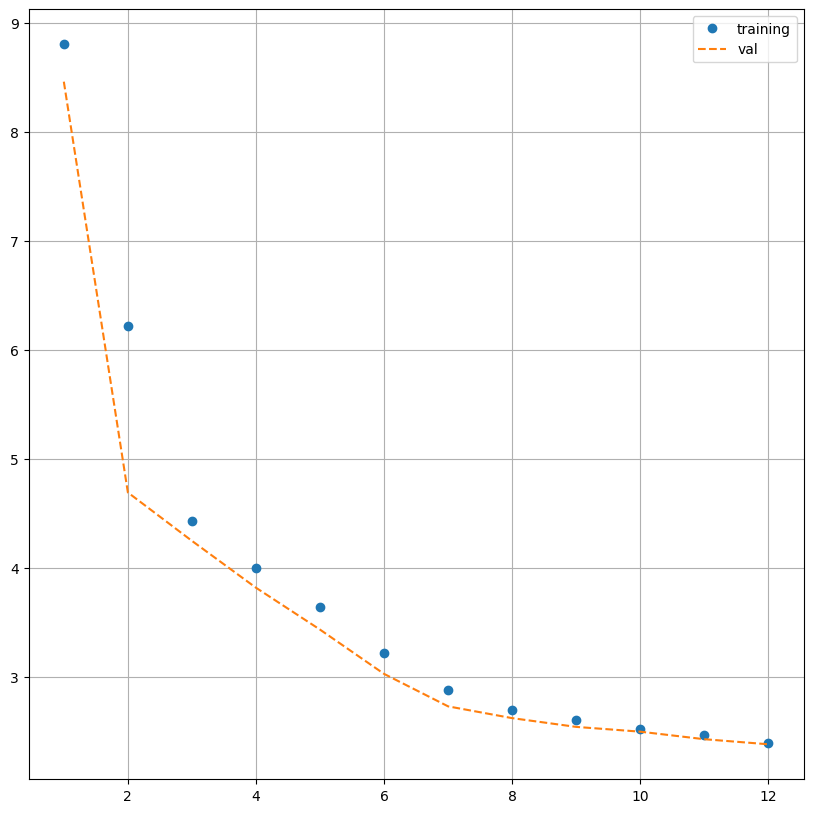

In [27]:
history_dict_l1_l2 = history_train_l1_l2.history
loss_values_l1_l2 = history_dict_l1_l2['loss']
val_loss_values_l1_l2 = history_dict_l1_l2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values_l1_l2)+1)
plt.plot(epoch,loss_values_l1_l2, 'o',label='training')
plt.plot(epoch,val_loss_values_l1_l2, '--',label='val')
plt.legend()
plt.grid()
plt.show()

Con la combinación de los reguladores L1-L2 se ha logrado llegar a un mejor acurrancy sin sobreajuste, sin embargo sigue siendo bajo con el detalle adicional que en pocas épocas se pierden los valores.

In [28]:
!git status
!git add .
!git commit -m "Implementación L1-L2. Mejor control y accurancy pero continua perdiendo los valores muy rápido."
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mejor_modelo_l1_l2.h5

no changes added to commit (use "git add" and/or "git commit -a")
[main 121caea] Implementación L1-L2. Mejor control y accurancy pero continua perdiendo los valores muy rápido.
 2 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 Digitos/src/mejor_modelo_l1_l2.h5
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 6.24 MiB | 7.20 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge

#### Dropout y L1-L2

In [42]:
# Cargar el modelo preentrenado
modelo_preentrenado_Dropout = tf.keras.models.load_model("mejor_modelo_segundo_entrenamiento.h5")

# Agregar capas de dropout y regularización L2
modelo_preentrenado_Dropout.add(layers.Dense(10, activation='relu',
                                        kernel_regularizer=l1_l2(l1=0.00001, l2=0.0001),
                                        name="mi_capa_Dropout"))
modelo_preentrenado_Dropout.add(Dropout(0.2))
modelo_preentrenado_Dropout.add(layers.Dense(10, activation='relu',
                                        kernel_regularizer=l1_l2(l1=0.00001, l2=0.0001),
                                        name="mi_capa_Dropout2"))

# Compilar el modelo con las nuevas configuraciones
custom_optimizer3 = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-10)
modelo_preentrenado_Dropout.compile(optimizer=custom_optimizer3,
                                  loss="categorical_crossentropy",
                                  metrics=["accuracy"])

# Define el callback ModelCheckpoint para guardar el mejor modelo
checkpoint_mejor_modelo_Dropout = ModelCheckpoint("mejor_modelo_Dropout.h5",
                                                  monitor="val_loss", save_best_only=True)

# Entrena el modelo preentrenado con el callback para guardar el mejor modelo
history_train_Dropout = modelo_preentrenado_Dropout.fit(train_images, train_labels, epochs=25, batch_size=10,
                                         callbacks=[checkpoint_mejor_modelo_Dropout],
                                         validation_split=0.2)

# Cargar el mejor modelo guardado durante el segundo entrenamiento
mejor_modelo_Dropout = tf.keras.models.load_model("mejor_modelo_Dropout.h5")

Epoch 1/25
4800/4800 [==============================] - 23s 4ms/step - loss: 4.9259 - accuracy: 0.1947 - val_loss: 3.4786 - val_accuracy: 0.2525
Epoch 2/25
4800/4800 [==============================] - 21s 4ms/step - loss: 3.7363 - accuracy: 0.2733 - val_loss: 2.9475 - val_accuracy: 0.3738
Epoch 3/25
4800/4800 [==============================] - 20s 4ms/step - loss: 3.0498 - accuracy: 0.3313 - val_loss: 2.0936 - val_accuracy: 0.4700
Epoch 4/25
4800/4800 [==============================] - 21s 4ms/step - loss: 2.6583 - accuracy: 0.3723 - val_loss: 1.8816 - val_accuracy: 0.4725
Epoch 5/25
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3709 - accuracy: 0.3943 - val_loss: 1.5796 - val_accuracy: 0.4788
Epoch 6/25
4800/4800 [==============================] - 22s 5ms/step - loss: 2.1080 - accuracy: 0.4214 - val_loss: 1.3342 - val_accuracy: 0.4871
Epoch 7/25
4800/4800 [==============================] - 22s 5ms/step - loss: 1.9043 - accuracy: 0.4649 - val_loss: 1.2090 - val_ac

In [43]:
# Evaluación el modelo en el conjunto de prueba
test_loss_Dropout, test_acc_Dropout = mejor_modelo_Dropout.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc_Dropout)

313/313 [==============================] - 1s 2ms/step - loss: 0.8788 - accuracy: 0.7722
Precisión en el conjunto de prueba: 0.7721999883651733


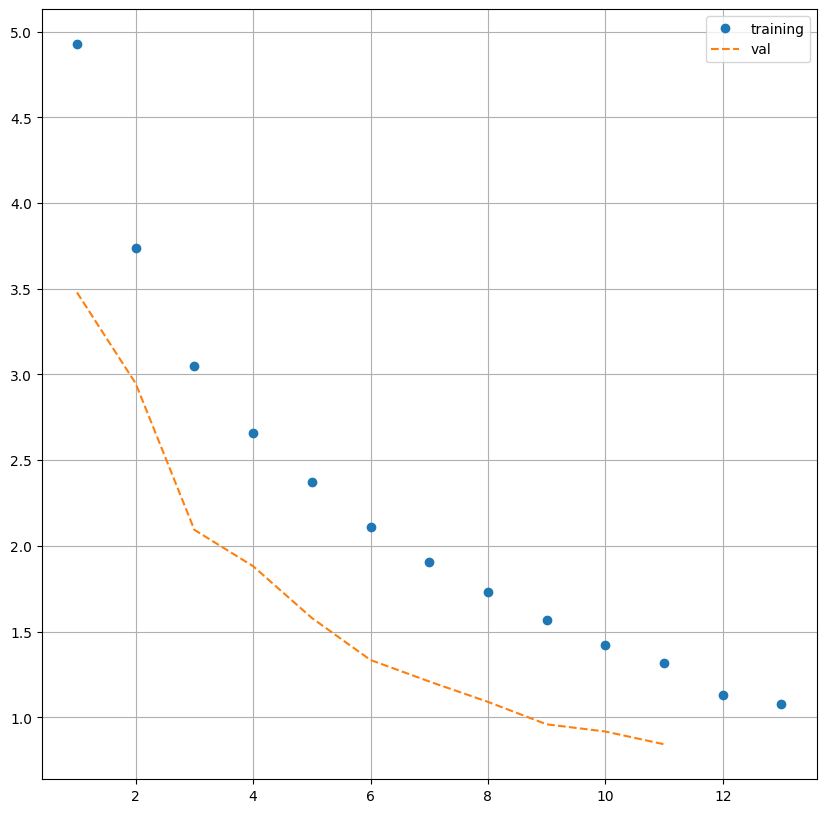

In [44]:
history_dict_Dropout = history_train_Dropout.history
loss_values_Dropout = history_dict_Dropout['loss']
val_loss_values_Dropout = history_dict_Dropout['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values_Dropout)+1)
plt.plot(epoch,loss_values_Dropout, 'o',label='training')
plt.plot(epoch,val_loss_values_Dropout, '--',label='val')
plt.legend()
plt.grid()
plt.show()

La implementación de Dropout logró ralentizar el momento donde los valores se pierden, gracias a eso se logró llegar a un mejor accurancy de los resultados además de no caer en un sobreajuste. Accurancy: 0.77

In [ ]:
!git status
!git add .
!git commit -m "Implementación Dropout. Mejor accurancy pero aún se pierden los datos en pocas épocas"
!git push

# Reporte de resultados

Logré obtener mejores resultados con un rango de aprendizaje lento y muchas epocas que volviendo a entrenar una red e implementando algún regularizador ya que los valores se perdían algo rápido con los regularizadores.

La implementación de Dropout junto con los regularizadores logró obtener mejores resultados que todo el uso único de regularizadores, sin embargo aun se encontraron problemas de pérdida de información.

In [45]:
!git status
!git add .
!git commit -m "Resumen de cambios"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mejor_modelo_Dropout.h5

no changes added to commit (use "git add" and/or "git commit -a")
[main 76ea93f] Resumen de cambios
 2 files changed, 1 insertion(+), 1 deletion(-)
 rewrite Digitos/src/Tarea3-Redes.ipynb (94%)
 create mode 100644 Digitos/src/mejor_modelo_Dropout.h5
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 6.35 MiB | 8.83 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   1